<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Website-case-study" data-toc-modified-id="Website-case-study-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Website case study</a></span><ul class="toc-item"><li><span><a href="#Step-1:--Define-your-objective" data-toc-modified-id="Step-1:--Define-your-objective-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Step 1:  Define your objective</a></span></li><li><span><a href="#Step-2:-Get-the-data" data-toc-modified-id="Step-2:-Get-the-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Step 2: Get the data</a></span></li><li><span><a href="#Step-3:-explore-your-data" data-toc-modified-id="Step-3:-explore-your-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Step 3: explore your data</a></span></li><li><span><a href="#Step-4:-Clean-up-your-data" data-toc-modified-id="Step-4:-Clean-up-your-data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Step 4: Clean up your data</a></span></li><li><span><a href="#Step-5:-manipulate-your-data,-making-calculations-based-on-it" data-toc-modified-id="Step-5:-manipulate-your-data,-making-calculations-based-on-it-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Step 5: manipulate your data, making calculations based on it</a></span></li><li><span><a href="#Step-6:-communicate-your-message-clearly" data-toc-modified-id="Step-6:-communicate-your-message-clearly-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Step 6: communicate your message clearly</a></span></li></ul></li><li><span><a href="#Barplots" data-toc-modified-id="Barplots-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Barplots</a></span><ul class="toc-item"><li><span><a href="#Definition-for-a-barplot" data-toc-modified-id="Definition-for-a-barplot-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Definition for a barplot</a></span></li><li><span><a href="#Enrichment" data-toc-modified-id="Enrichment-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Enrichment</a></span></li><li><span><a href="#Ordering-the-bars-in-the-barplot" data-toc-modified-id="Ordering-the-bars-in-the-barplot-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Ordering the bars in the barplot</a></span></li></ul></li></ul></div>

>All content is released under Creative Commons Attribution [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/) and all source code is released under a [BSD-3 clause license](https://en.wikipedia.org/wiki/BSD_licenses). 
>
>Please reuse, remix, revise, and reshare this content in any way, keeping this notice.
>
><img style="float: right;" width="150px" src="images/jupyter-logo.png">**Are you viewing this on jupyter.org?** Then this notebook will be read-only. <br>
>See how you can interactively run the code in this notebook by visiting our [instruction page about Notebooks](https://yint.org/notebooks). 

In [1]:
# Standard imports required to show plots and tables in this notebook
from matplotlib import pyplot
from IPython.display import display
%matplotlib inline

# Over the next few notebooks we will look at basic data plots:

1. Bar plots (bar charts) **`<-- this notebook`**
1. Histograms
1. Time-series, or a sequence plot
1. Scatter plot
1. Data tables

# Bar plots

Bar plots are a simple (though inefficient) way to visualize information. You don't need to explain them, almost everyone has seen one and knows how to read it. 

We will use the case study below to introduce the topic and point out some issues to be aware of.


## Website case study

We will follow the 6 steps from the [general data science workflow](./01.8%20The%20data%20science%20workflow.ipynb) (see the prior notebook for more details).

**Step 1** is to ***define*** your objective: we have recorded visits to a small website. Which day of the week is the most popular, and which is the least popular? 

**Step 2** is to get your data

**Step 3** asks to explore your data, look at it and make summaries, get a feeling for what you have.

**Step 4** is to clean up your data. Thankfully this has been done already.

**Step 5** is use the data to solve your goal/objective, to manipulate the data.

**Step 6** is to communicate your results, which is what the main task is here, using a bar plot.

### Step 1:  Define your objective

We have a small website, and we record the number of visitors each data. Our ***objective*** is to find which day of the week is the most popular, and which is the least popular. 

Why? If we absolutely need to take the website off-line, we can pick a day which has minimal disruption for our visitors.

### Step 2: Get the data

The data has been assembled for you already. You can read more about the data, and download it from here: http://openmv.net/info/website-traffic 

Refer back to the module on loading data from a CSV file, if needed. 

In [2]:
import pandas as pd
website = pd.read_csv('http://openmv.net/file/website-traffic.csv')
print(website.head())
print(website.tail())
website.describe()

   DayOfWeek MonthDay  Year  Visits
0     Monday   June 1  2009      27
1    Tuesday   June 2  2009      31
2  Wednesday   June 3  2009      38
3   Thursday   June 4  2009      38
4     Friday   June 5  2009      31
     DayOfWeek     MonthDay  Year  Visits
209     Sunday  December 27  2009      15
210     Monday  December 28  2009      24
211    Tuesday  December 29  2009      18
212  Wednesday  December 30  2009      10
213   Thursday  December 31  2009       7


,Year,Visits
count,214.0,214.000000
mean,2009.0,22.233645
std,0.0,8.331826
min,2009.0,3.000000
25%,2009.0,16.250000
50%,2009.0,22.000000
75%,2009.0,27.750000
max,2009.0,48.000000


### Step 3: explore your data

We have done a little bit of this step already, above, when we used the ``.describe()`` function.

So it seems like we have data from 1 June 2009 till 31 December 2009 here, sorted in order.

If you are paying attention, you will notice that the ``.head()`` command gives information about more columns than ``.describe()``. 

That is because, by default, ``.describe()`` will only describe numeric columns. To see a summary of all columns, use the following:

In [3]:
website.describe(include='all')

,DayOfWeek,MonthDay,Year,Visits
count,214,214,214.0,214.000000
unique,7,214,NaN,NaN
top,Thursday,September 12,NaN,NaN
freq,31,1,NaN,NaN
mean,NaN,NaN,2009.0,22.233645
std,NaN,NaN,0.0,8.331826
min,NaN,NaN,2009.0,3.000000
25%,NaN,NaN,2009.0,16.250000
50%,NaN,NaN,2009.0,22.000000
75%,NaN,NaN,2009.0,27.750000


We see that `DayOfWeek` has 7 unique values, which is expected.

`DayOfWeek` is not a quantitative (numeric) column. So we cannot calculate the average, the minimum, the maximum, etc, which is why those rows in the summary table are `NaN` (not a number).

Columns `Year` and ``Visits`` are quantitative, so those averages, minimums, maximums, etc can be quantified.

In contrast, `DayOfWeek` can be collected in groups (categories), and then we can count the number of data items in that group. For example, we could ask how many rows (in our dataset) are on "Monday". When we can can group rows into categories, we call it ``Categorical`` data.


Plenty of data you will work with are categorical. Some examples:
* *type of operating system*: Linux, Mac, Windows,...
* *colour eyes*: grey, blue, green, brown, ...
* *shape of object*: square, circular, rectangular, ...

#### Self-check:

* Name/describe some other examples of categorical data you have worked with recently.
* Which of these are categorical, and which are quantitative?

    * Number of years of education since high-school
    * Highest level of education achieved
    * 1st year student, 2nd year student, 3rd year student, ...
    * Relationship status
    * Fuel type used in cars
    * Octane number
    * Type of sweetener used: sugar, honey, stevia, maple syrup, ...

### Step 4: Clean up your data

We don't see any issues in the data yet. It actually was in a good condition already. In a later notebook we will show you can plot the number of visits against time. Perhaps there are issues that you will see then. 

For now we will assume the data are clean and that we can start to manipulate it.

### Step 5: manipulate your data, making calculations based on it 

To answer our question from step 1, we would like to summarize the average number of website visits, grouped per day.

In step 2 we saw that there is a column called `DayOfWeek`. In other words, we want to collect all visits from the same day together and calculate the average number of visits on that day.

If this were a table of results, we would want one column with 7 rows, one for each day of the week. In a second column we would want the average number of visitors on that day.

Luckily Pandas provides a function that does that for us: ``.groupby(...)``. It will group the data by a given categorical column.

```python
website.groupby(by='DayOfWeek')```

But once the rows have been grouped, you need to indicate what you want to do within those groups. Here are some examples:

```python
    website.groupby(by='DayOfWeek').mean()   # calculate the average per group for the other columns
    website.groupby(by='DayOfWeek').count()
    website.groupby(by='DayOfWeek').max()    # once grouped, calculate the maximum per group
    website.groupby(by='DayOfWeek').min()

```


In [4]:
# Now we are ready to manipulate the data:
average_visits_per_day = website.groupby('DayOfWeek').mean()  
display(average_visits_per_day)

# The 'Year' column is not needed, and will cause problems 
# with our visualization. Since it is "2009" for all rows, 
# it also provides little value.
website = website.drop(columns='Year')
average_visits_per_day = average_visits_per_day.drop(columns='Year')
print('After removing the "Year" column there is only 1 column of data:')
display(average_visits_per_day)

,Year,Visits
DayOfWeek,,
Friday,2009.0,20.766667
Monday,2009.0,25.322581
Saturday,2009.0,15.266667
Sunday,2009.0,17.633333
Thursday,2009.0,23.709677
Tuesday,2009.0,25.774194
Wednesday,2009.0,26.741935


After removing the "Year" column there is only 1 column of data:


,Visits
DayOfWeek,
Friday,20.766667
Monday,25.322581
Saturday,15.266667
Sunday,17.633333
Thursday,23.709677
Tuesday,25.774194
Wednesday,26.741935


### Step 6: communicate your message clearly

A bar plot can be used to show these results graphically. Though, a table, as above, is perfectly valid, and actually meets the goals we set in step 1. We will come back to this point later.

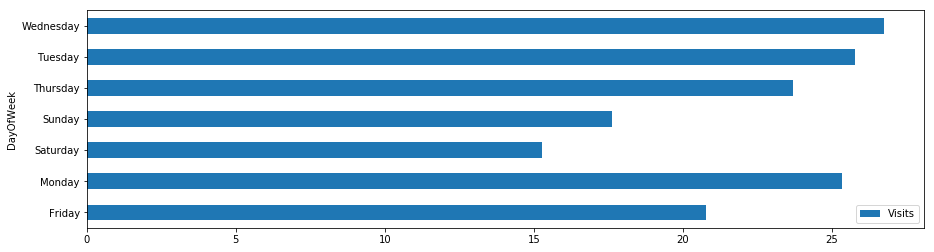

In [5]:
# Plot the data in a horizontal bar (barh)
average_visits_per_day.plot.barh(figsize=(15, 4));

The results show better in a horizontal bar, with the ``barh`` command, than with vertical bars. Try using vertical bars, by modifying the above code and simply use ``bar``. Why is the ``barh`` command preferred?

#### Final checks
1. The most visits, *on average*, occur on a \_\_\_\_day.
2. If the website should go offline for an entire day, the best day to pick would be a \_\_\_\_day.
3. Is the bar plot strictly necessary in this case study when compared to the data table? *In other words*, what value does the bar plot provide, if any, that is not provided by the table?

## Barplots

![alt="Bar plot terminology"](images/summarizing-data/barplot-example-expenses.png)

* A bar plot should be used when there are many categories.
* The category axis can be shown on the vertical axis. In this case we call it a horizontal bar chart (`barh`), since the bars are horizontal. It makes the chart labels more readable; but a "regular" bar plot with vertical bars (`bar`) and labels on the horizontal axis is also possible.
* The text can sometimes be added *inside the bar* if there is restricted space.
* An interesting characteristic of a bar plot is that **the *interpretation* of a bar plot does not differ if the category axis is reordered.** It can be easier to interpret the plot with a particular ordering; however, the interpretation won't be *different* if using a different ordering. The example below demonstrates this: the interpretation has not changed, but the visualization is far more effective.

### Definition for a barplot

It seems strange to end off with a definition of a bar plot. But perhaps it isn't: you see these types of plots everywhere, especially in the media. But it is hard to describe what they actually are. Here's one definition:

> The bar plot is a univariate plot on a two-dimensional axis. The axes are not called x- or y-axes. Instead, one axis is called the ***category axis*** showing the category name, while the other, the ***value axis***, shows the value of each category as a bar.


### Enrichment

Bar plots are notorious for their use of excessive 'ink': using many pixels to show a small amount of 'data'. We should aim to maximize the data:ink ratio, which means high amount of data represented with as few pixels as possible. Bar plots do not do that. 

Read more [about barplots here](https://learnche.org/pid/data-visualization/bar-plots).



### Ordering the bars in the barplot

The categories used in a barplot can often be rearranged without 'breaking' the message.  We saw an example above.

This happened because each bar is independent of the others. If you re-order them, the information shown -- from the height of the bars, on the value axis -- is still the same.

This does not mean you should show the bar plot in a random order. By ordering the information you make the plot easier to read, and in an underhanded way you subtly alter how the user reads the message. You can use this power to your advantage to make the message clearer, but you can also use it to frustrate your reader. Rather do the former, and not the latter.

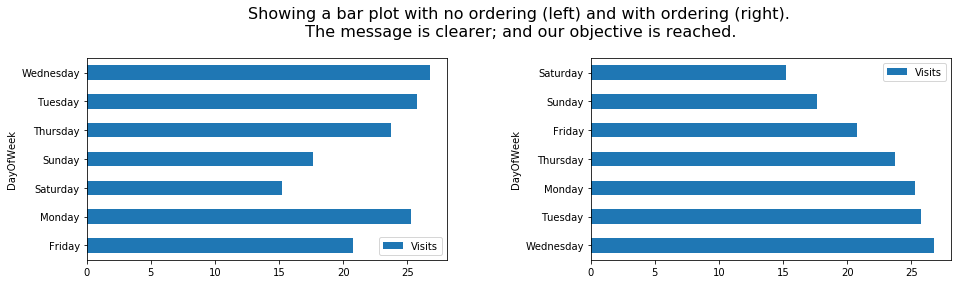

In [7]:
fig = pyplot.figure(figsize=(15, 4));
pyplot.subplots_adjust(top=0.8, bottom=0.1, left=0.1, right=0.9, hspace=0.5, wspace=0.4);

# Left plot: subplot(1,2,1) means: create 1 row, with 2 columns, and draw in the 1st box
average_visits_per_day.plot.barh(ax=pyplot.subplot(1, 2, 1));

# Right plot: subplot(1,2,2) means: create 1 row, with 2 columns, and draw in the 2nd box
# Take the same grouped data from before, except sort it now:
sorted_data = average_visits_per_day.sort_values('Visits', ascending=False)  
sorted_data.plot.barh(ax=pyplot.subplot(1, 2, 2));

pyplot.suptitle(('Showing a bar plot with no ordering (left) and '
                 'with ordering (right).\n The message is clearer; '
                'and our objective is reached.'), fontsize=16);

The plot on the right helps make our objective clearer. Recall, it was "to find which day of the week is the most popular, and which is the least popular" for our website. 

The plot on the left can answer those questions, but the plot on the right is far more effective, and easier to read.